In [123]:
import numpy as np
import pandas as pd

from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score









## GLASS.CSV

# 1 - Business Problem

Prepare a classification model using KNN for glass data

## 2 - Data collection and description

In [77]:
data = pd.read_csv("/content/glass.csv")


In [78]:
data1 = data.copy()


In [80]:
data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## EDA

In [81]:
data1.shape

(214, 10)

In [82]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [83]:
data1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Correlation

In [84]:
cor = data1.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


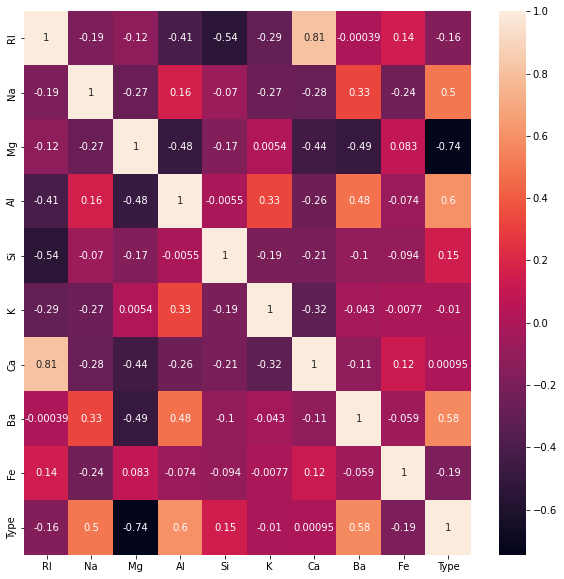

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the hight correlated variables

In [86]:
plt.rcParams["figure.figsize"] = 9,5

In [88]:
print('Fe')
print("Skew: {}".format(data1['Fe'].skew()))
print("Kurtosis: {}".format(data1['Fe'].kurtosis()))

print('Ba')
print("Skew: {}".format(data1['Ba'].skew()))
print("Kurtosis: {}".format(data1['Ba'].kurtosis()))

print('Ca')
print("Skew: {}".format(data1['Ca'].skew()))
print("Kurtosis: {}".format(data1['Ca'].kurtosis()))

print('Na')
print("Skew: {}".format(data1['Na'].skew()))
print("Kurtosis: {}".format(data1['Na'].kurtosis()))


Fe
Skew: 1.754327470435831
Kurtosis: 2.662015617441455
Ba
Skew: 3.4164245693025577
Kurtosis: 12.541083582809152
Ca
Skew: 2.0470539131183103
Kurtosis: 6.681977951411165
Na
Skew: 0.4541814536577495
Kurtosis: 3.0522324094919218


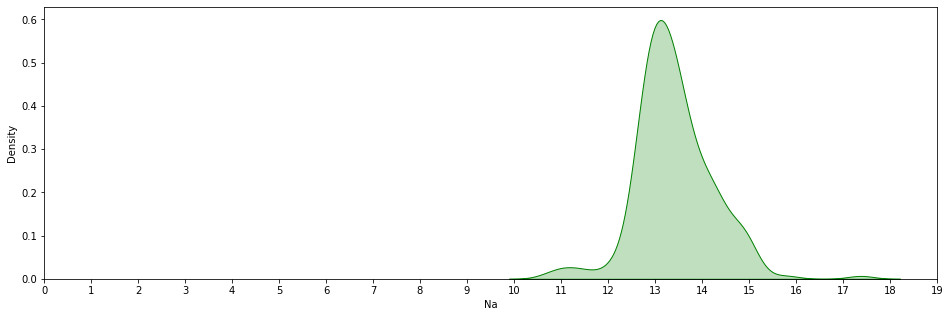

In [91]:
plt.figure(figsize=(16,5))

ax = sns.kdeplot(data['Na'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The Data is Positively skewed and has high kurtosis value



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


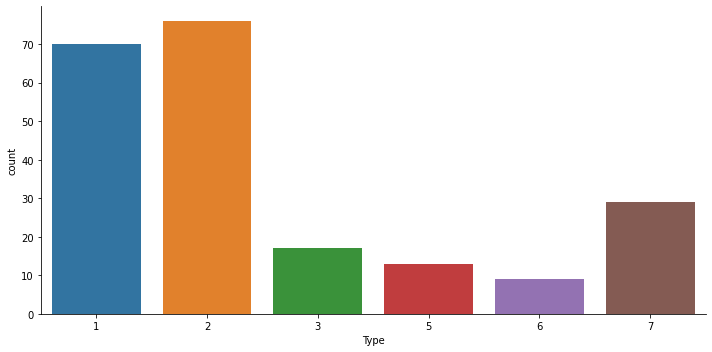

In [96]:
sns.factorplot('Type', data=data1, kind="count",size = 5,aspect = 2)

As shown in the graphs above, majority of the glass types are building_windows_float_processed and building_windows_non_float_processed, followed by headlamps

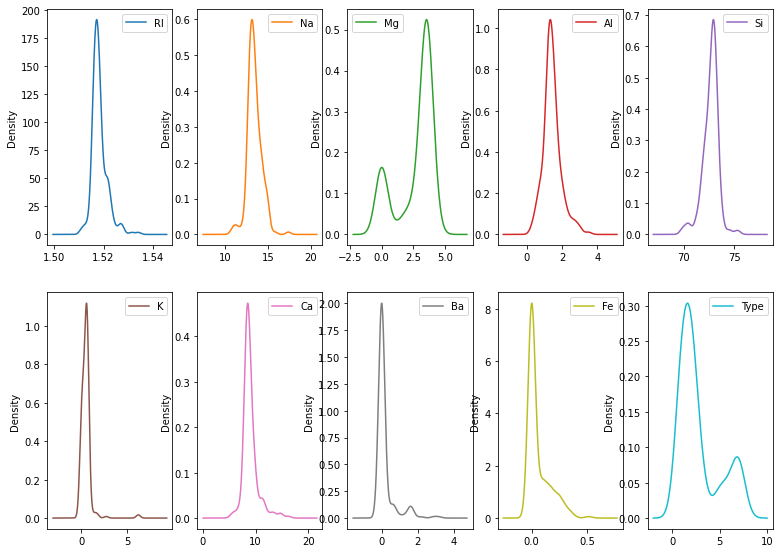

In [97]:
data1.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

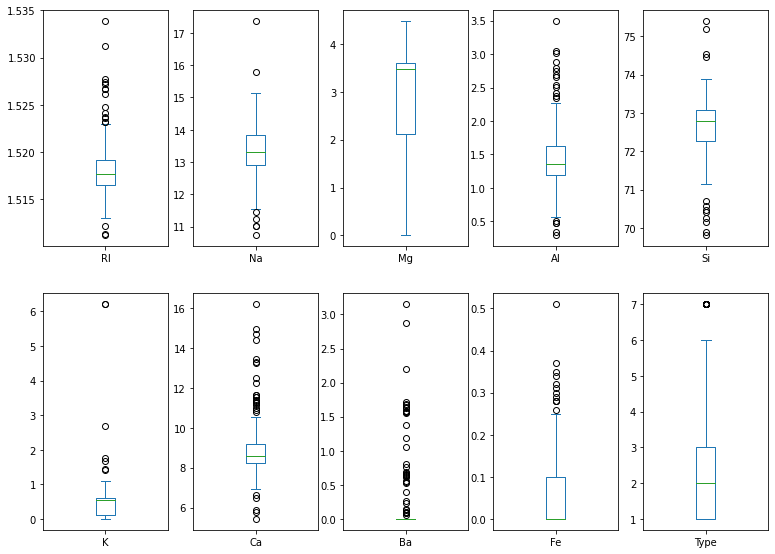

In [98]:
data1.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


## **3 - KNN**

In [99]:
data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [104]:
X = data1.iloc[:,0:9]
Y = data1.iloc[:,9]

In [105]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [106]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [108]:
y_test

197    7
37     1
89     2
176    6
170    5
75     2
96     2
137    2
5      1
83     2
55     1
145    2
160    3
112    2
74     2
202    7
126    2
12     1
153    3
158    3
168    5
141    2
Name: Type, dtype: int64

In [109]:
y_train

194    7
189    7
144    2
18     1
208    7
      ..
67     1
192    7
117    2
47     1
172    5
Name: Type, Length: 192, dtype: int64

In [110]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.00
89,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
83,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09


In [111]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24
18,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.00
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
...,...,...,...,...,...,...,...,...,...
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10


In [124]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [125]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

In [126]:
test_accuracy

[0.7272727272727273,
 0.5454545454545454,
 0.5454545454545454,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.45454545454545453,
 0.4090909090909091,
 0.45454545454545453,
 0.45454545454545453,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.45454545454545453,
 0.45454545454545453,
 0.45454545454545453,
 0.5]

In [127]:
train_accuracy

[1.0,
 0.8385416666666666,
 0.828125,
 0.78125,
 0.765625,
 0.7760416666666666,
 0.7395833333333334,
 0.75,
 0.703125,
 0.6927083333333334,
 0.6770833333333334,
 0.6875,
 0.671875,
 0.6927083333333334,
 0.6770833333333334,
 0.6822916666666666,
 0.6927083333333334,
 0.6770833333333334,
 0.6666666666666666,
 0.671875,
 0.671875,
 0.6666666666666666,
 0.671875,
 0.6770833333333334]

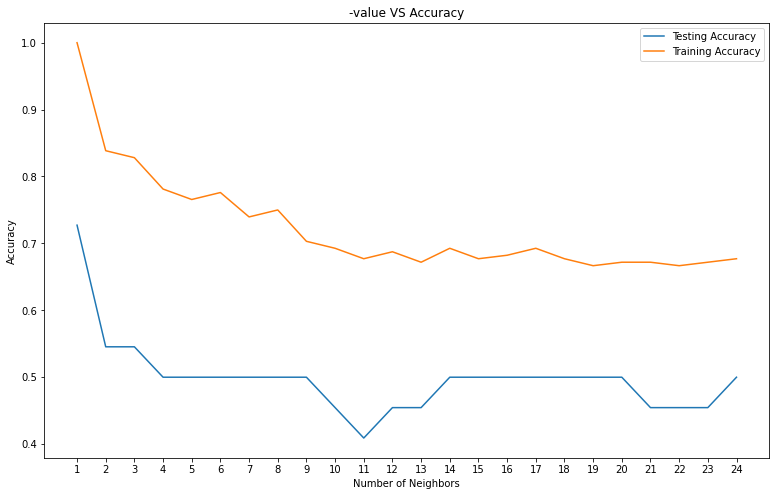

In [128]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

we can see that k=3 produces the most accurate results

## Applying the algorithm

In [129]:
knn = KNeighborsClassifier(n_neighbors=3)

In [130]:
knn.fit(x_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(x_test)

In [131]:
scores = []
cv_scores = []

In [132]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [140]:
scores

[0.5454545454545454]

In [134]:
score_knn=cross_val_score(knn, X,Y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


In [141]:
score_knn

array([0.63636364, 0.5       , 0.72727273, 0.59090909, 0.71428571,
       0.80952381, 0.76190476, 0.38095238, 0.71428571, 0.66666667])

In [135]:
score_knn.mean()

0.6502164502164502

In [136]:
score_knn.std()*2

0.2458035952389518

In [137]:
cv_score = score_knn.mean()

In [138]:
cv_scores.append(cv_score)

In [139]:
cv_scores

[0.6502164502164502]

## 4 - Conclusion

KNN Accuracy: 0.65 (+/- 0.24)

## ZOO.CSV

# 1 - Business Problem
Prepare a classification model using KNN for zoo data

## 2 - Data collection and description

In [233]:
data = pd.read_csv("/content/Zoo.csv")

In [234]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [235]:
data1 =data.copy()

## EDA

In [236]:
data1.shape

(101, 18)

In [237]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [238]:
data1.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

Correlation

In [239]:
cor = data1.corr()

In [240]:
cor

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


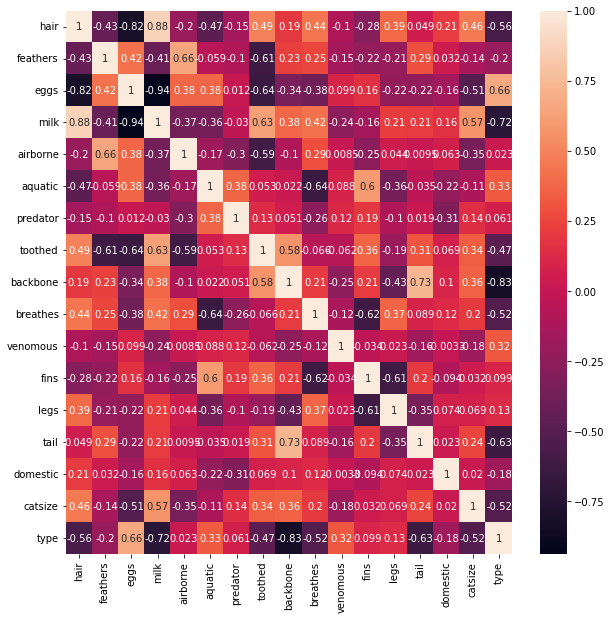

In [241]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the hight correlated variables

In [242]:
plt.rcParams["figure.figsize"] = 9,5

In [243]:

print("Skew: {}".format(data1['domestic'].skew()))
print("Kurtosis: {}".format(data1['domestic'].kurtosis()))

Skew: 2.250990921559568
Kurtosis: 3.1285273168390018


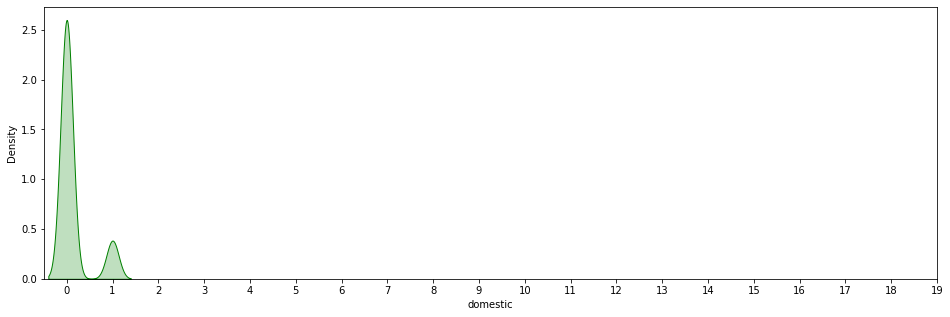

In [244]:
plt.figure(figsize=(16,5))

ax = sns.kdeplot(data['domestic'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


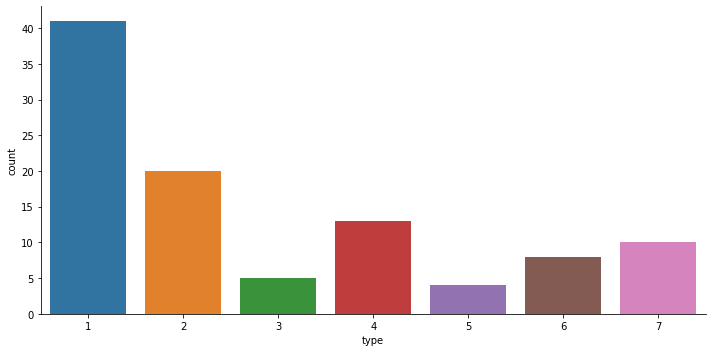

In [245]:
sns.factorplot('type', data=data1, kind="count",size = 5,aspect = 2)

As shown in the graphs above, highest number of animals available in Zoo are Type 1 followed by 2, 4 and 7 respectively

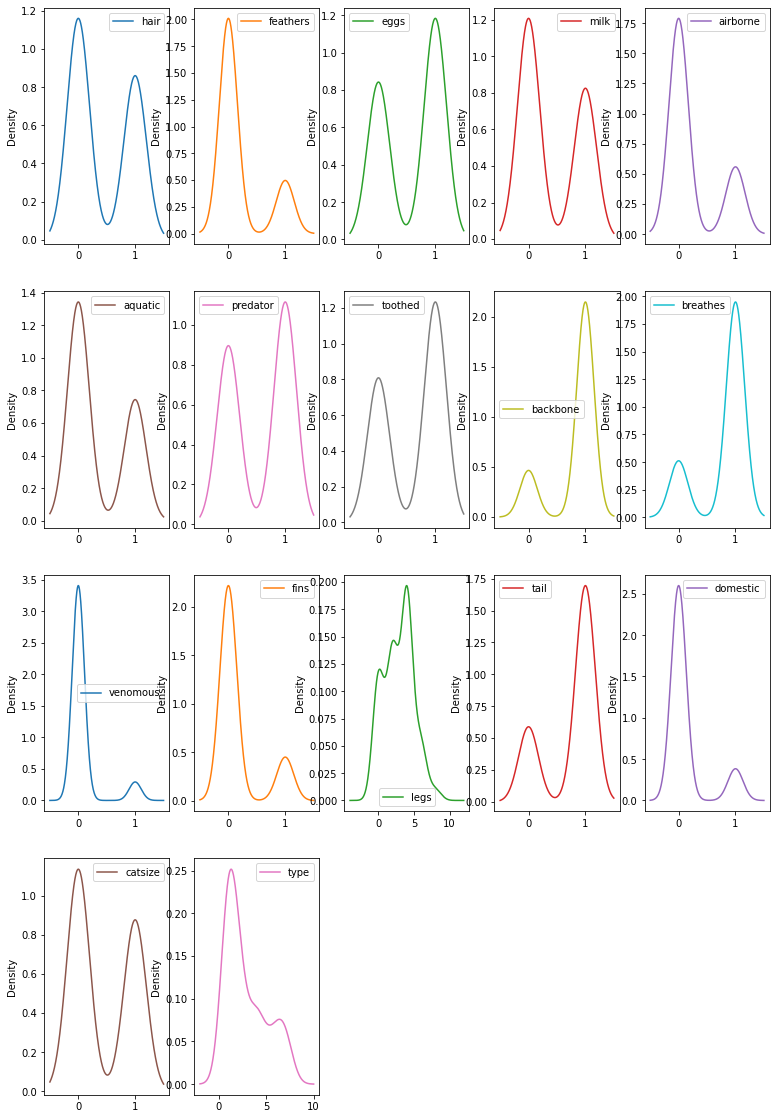

In [246]:
data1.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

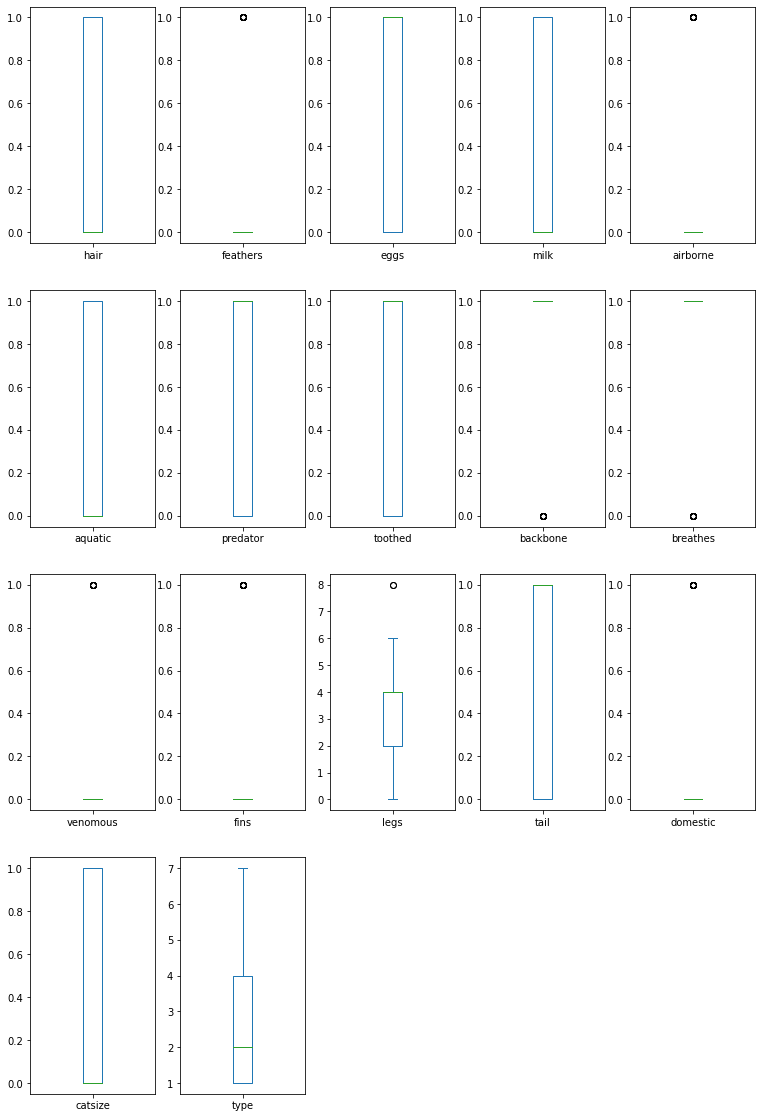

In [247]:
data1.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

## KNN

In [248]:
data1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [249]:
X = data1.iloc[:,1:17]
Y = data1.iloc[:,17]

In [250]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [251]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [252]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [253]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [254]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

In [255]:
train_accuracy

[1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9333333333333333,
 0.9111111111111111,
 0.8777777777777778,
 0.8777777777777778,
 0.8444444444444444,
 0.7888888888888889,
 0.7888888888888889,
 0.7888888888888889,
 0.7888888888888889,
 0.7888888888888889,
 0.7888888888888889,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778]

In [256]:
test_accuracy

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182,
 0.8181818181818182]

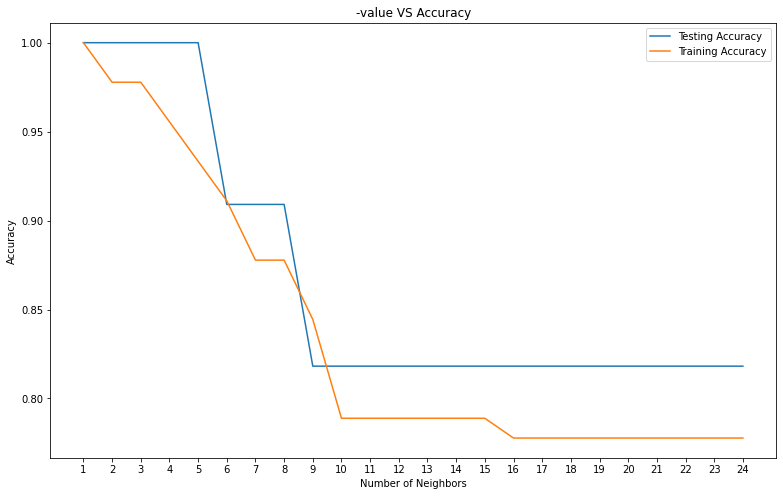

In [257]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

we can see that k=6 produces the most accurate results

## Applying the algorithm

In [258]:
knn = KNeighborsClassifier(n_neighbors=6)

In [259]:
knn.fit(x_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(x_test)

In [260]:
scores = []
cv_scores = []

In [261]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [262]:
scores

[0.9090909090909091]

In [263]:
score_knn=cross_val_score(knn, X,Y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


In [264]:
score_knn

array([0.90909091, 0.9       , 0.8       , 0.9       , 0.9       ,
       0.9       , 0.9       , 0.8       , 0.8       , 0.9       ])

In [265]:
score_knn.mean()

0.8709090909090909

In [266]:
score_knn.std()*2

0.09299426801850486

In [267]:
cv_score = score_knn.mean()

In [268]:
cv_scores.append(cv_score)

In [269]:
cv_scores

[0.8709090909090909]

## 4 - Conclusion
KNN Accuracy: 0.87 (+/- 0.9)